In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import  KNNImputer
import seaborn as sb

# Importation du dataset

In [2]:
dataset=pd.read_csv("bench.csv")
dataset

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

# Selection des valeurs pertinenentes 

In [4]:
df=dataset[["ENERGYSTARScore","BuildingType","PrimaryPropertyType","NumberofBuildings","YearBuilt","NumberofFloors","PropertyGFAParking","SiteEnergyUse(kBtu)","SiteEUI(kBtu/sf)","SourceEUI(kBtu/sf)","SteamUse(kBtu)","Electricity(kWh)","NaturalGas(kBtu)","GHGEmissionsIntensity","TotalGHGEmissions"]]
df

,ENERGYSTARScore,BuildingType,PrimaryPropertyType,NumberofBuildings,YearBuilt,NumberofFloors,PropertyGFAParking,SiteEnergyUse(kBtu),SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SteamUse(kBtu),Electricity(kWh),NaturalGas(kBtu),GHGEmissionsIntensity,TotalGHGEmissions
0,60.0,NonResidential,Hotel,1.0,1927,12,0,7.226362e+06,81.699997,182.500000,2003882.00,1.156514e+06,1.276453e+06,2.83,249.98
1,61.0,NonResidential,Hotel,1.0,1996,11,15064,8.387933e+06,94.800003,176.100006,0.00,9.504252e+05,5.145082e+06,2.86,295.86
2,43.0,NonResidential,Hotel,1.0,1969,41,196718,7.258702e+07,96.000000,241.899994,21566554.00,1.451544e+07,1.493800e+06,2.19,2089.28
3,56.0,NonResidential,Hotel,1.0,1926,10,0,6.794584e+06,110.800003,216.199997,2214446.25,8.115253e+05,1.811213e+06,4.67,286.43
4,75.0,NonResidential,Hotel,1.0,1980,18,62000,1.417261e+07,114.800003,211.399994,0.00,1.573449e+06,8.803998e+06,2.88,505.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,46.0,Nonresidential COS,Office,1.0,1990,1,0,8.497457e+05,69.099998,161.699997,0.00,1.536550e+05,3.254750e+05,1.70,20.94
3372,NaN,Nonresidential COS,Other,1.0,2004,1,0,9.502762e+05,59.400002,114.199997,0.00,1.162210e+05,5.537300e+05,2.01,32.17
3373,NaN,Nonresidential COS,Other,1.0,1974,1,0,5.765898e+06,438.200012,744.799988,0.00,5.252517e+05,3.973739e+06,16.99,223.54
3374,NaN,Nonresidential COS,Mixed Use Property,1.0,1989,1,0,7.194712e+05,51.000000,105.300003,0.00,1.022480e+05,3.706010e+05,1.57,22.11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ENERGYSTARScore        2533 non-null   float64
 1   BuildingType           3376 non-null   object 
 2   PrimaryPropertyType    3376 non-null   object 
 3   NumberofBuildings      3368 non-null   float64
 4   YearBuilt              3376 non-null   int64  
 5   NumberofFloors         3376 non-null   int64  
 6   PropertyGFAParking     3376 non-null   int64  
 7   SiteEnergyUse(kBtu)    3371 non-null   float64
 8   SiteEUI(kBtu/sf)       3369 non-null   float64
 9   SourceEUI(kBtu/sf)     3367 non-null   float64
 10  SteamUse(kBtu)         3367 non-null   float64
 11  Electricity(kWh)       3367 non-null   float64
 12  NaturalGas(kBtu)       3367 non-null   float64
 13  GHGEmissionsIntensity  3367 non-null   float64
 14  TotalGHGEmissions      3367 non-null   float64
dtypes: f

In [6]:
df.describe()

,ENERGYSTARScore,NumberofBuildings,YearBuilt,NumberofFloors,PropertyGFAParking,SiteEnergyUse(kBtu),SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SteamUse(kBtu),Electricity(kWh),NaturalGas(kBtu),GHGEmissionsIntensity,TotalGHGEmissions
count,2533.000000,3368.000000,3376.000000,3376.000000,3376.000000,3.371000e+03,3369.000000,3367.000000,3.367000e+03,3.367000e+03,3.367000e+03,3367.000000,3367.000000
mean,67.918674,1.106888,1968.573164,4.709123,8001.526066,5.403667e+06,54.732116,134.232848,2.745959e+05,1.086639e+06,1.368505e+06,1.175916,119.723971
std,26.873271,2.108402,33.088156,5.494465,32326.723928,2.161063e+07,56.273124,139.287554,3.912173e+06,4.352478e+06,6.709781e+06,1.821452,538.832227
min,1.000000,0.000000,1900.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,-3.382680e+04,0.000000e+00,-0.020000,-0.800000
25%,53.000000,1.000000,1948.000000,2.000000,0.000000,9.251286e+05,27.900000,74.699997,0.000000e+00,1.874229e+05,0.000000e+00,0.210000,9.495000
50%,75.000000,1.000000,1975.000000,4.000000,0.000000,1.803753e+06,38.599998,96.199997,0.000000e+00,3.451299e+05,3.237540e+05,0.610000,33.920000
75%,90.000000,1.000000,1997.000000,5.000000,0.000000,4.222455e+06,60.400002,143.899994,0.000000e+00,8.293178e+05,1.189034e+06,1.370000,93.940000
max,100.000000,111.000000,2015.000000,99.000000,512608.000000,8.739237e+08,834.400024,2620.000000,1.349435e+08,1.925775e+08,2.979090e+08,34.090000,16870.980000


# Visualisation des valeurs manquantes

In [7]:
df.isna().sum()

ENERGYSTARScore          843
BuildingType               0
PrimaryPropertyType        0
NumberofBuildings          8
YearBuilt                  0
NumberofFloors             0
PropertyGFAParking         0
SiteEnergyUse(kBtu)        5
SiteEUI(kBtu/sf)           7
SourceEUI(kBtu/sf)         9
SteamUse(kBtu)             9
Electricity(kWh)           9
NaturalGas(kBtu)           9
GHGEmissionsIntensity      9
TotalGHGEmissions          9
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ENERGYSTARScore        2533 non-null   float64
 1   BuildingType           3376 non-null   object 
 2   PrimaryPropertyType    3376 non-null   object 
 3   NumberofBuildings      3368 non-null   float64
 4   YearBuilt              3376 non-null   int64  
 5   NumberofFloors         3376 non-null   int64  
 6   PropertyGFAParking     3376 non-null   int64  
 7   SiteEnergyUse(kBtu)    3371 non-null   float64
 8   SiteEUI(kBtu/sf)       3369 non-null   float64
 9   SourceEUI(kBtu/sf)     3367 non-null   float64
 10  SteamUse(kBtu)         3367 non-null   float64
 11  Electricity(kWh)       3367 non-null   float64
 12  NaturalGas(kBtu)       3367 non-null   float64
 13  GHGEmissionsIntensity  3367 non-null   float64
 14  TotalGHGEmissions      3367 non-null   float64
dtypes: f

# Traitement des valeurs manquantes

In [9]:
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
imputer=imputer.fit(df.iloc[:,0:1])
df.iloc[:,0:1]=imputer.transform(df.iloc[:,0:1])

/var/folders/64/xbnl04752rd562f9w8d832xh0000gn/T/ipykernel_39638/1991120152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:,0:1]=imputer.transform(df.iloc[:,0:1])


In [10]:
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
imputer=imputer.fit(df.iloc[:,3:4])
df.iloc[:,3:4]=imputer.transform(df.iloc[:,3:4])

/var/folders/64/xbnl04752rd562f9w8d832xh0000gn/T/ipykernel_39638/28753900.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:,3:4]=imputer.transform(df.iloc[:,3:4])


In [11]:
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
imputer=imputer.fit(df.iloc[:,7:15])
df.iloc[:,7:15]=imputer.transform(df.iloc[:,7:15])

/var/folders/64/xbnl04752rd562f9w8d832xh0000gn/T/ipykernel_39638/2097499806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:,7:15]=imputer.transform(df.iloc[:,7:15])


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ENERGYSTARScore        3376 non-null   float64
 1   BuildingType           3376 non-null   object 
 2   PrimaryPropertyType    3376 non-null   object 
 3   NumberofBuildings      3376 non-null   float64
 4   YearBuilt              3376 non-null   int64  
 5   NumberofFloors         3376 non-null   int64  
 6   PropertyGFAParking     3376 non-null   int64  
 7   SiteEnergyUse(kBtu)    3376 non-null   float64
 8   SiteEUI(kBtu/sf)       3376 non-null   float64
 9   SourceEUI(kBtu/sf)     3376 non-null   float64
 10  SteamUse(kBtu)         3376 non-null   float64
 11  Electricity(kWh)       3376 non-null   float64
 12  NaturalGas(kBtu)       3376 non-null   float64
 13  GHGEmissionsIntensity  3376 non-null   float64
 14  TotalGHGEmissions      3376 non-null   float64
dtypes: f

In [13]:
df.describe()

,ENERGYSTARScore,NumberofBuildings,YearBuilt,NumberofFloors,PropertyGFAParking,SiteEnergyUse(kBtu),SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SteamUse(kBtu),Electricity(kWh),NaturalGas(kBtu),GHGEmissionsIntensity,TotalGHGEmissions
count,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3.376000e+03,3376.000000,3376.000000,3.376000e+03,3.376000e+03,3.376000e+03,3376.000000,3376.000000
mean,69.686908,1.106635,1968.573164,4.709123,8001.526066,5.398336e+06,54.698667,134.131457,2.738639e+05,1.084662e+06,1.365719e+06,1.174408,119.495228
std,23.477384,2.105908,33.088156,5.494465,32326.723928,2.159506e+07,56.219527,139.115541,3.906979e+06,4.346839e+06,6.701045e+06,1.819256,538.131497
min,1.000000,0.000000,1900.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,-3.382680e+04,0.000000e+00,-0.020000,-0.800000
25%,61.000000,1.000000,1948.000000,2.000000,0.000000,9.260192e+05,27.900000,74.699997,0.000000e+00,1.878587e+05,0.000000e+00,0.210000,9.547500
50%,75.000000,1.000000,1975.000000,4.000000,0.000000,1.803753e+06,38.599998,96.199997,0.000000e+00,3.451299e+05,3.237540e+05,0.610000,33.920000
75%,85.000000,1.000000,1997.000000,5.000000,0.000000,4.218227e+06,60.325000,143.800003,0.000000e+00,8.263712e+05,1.187638e+06,1.370000,93.717500
max,100.000000,111.000000,2015.000000,99.000000,512608.000000,8.739237e+08,834.400024,2620.000000,1.349435e+08,1.925775e+08,2.979090e+08,34.090000,16870.980000


# Visualisation des relations entre les variables

/var/folders/64/xbnl04752rd562f9w8d832xh0000gn/T/ipykernel_39638/592788651.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


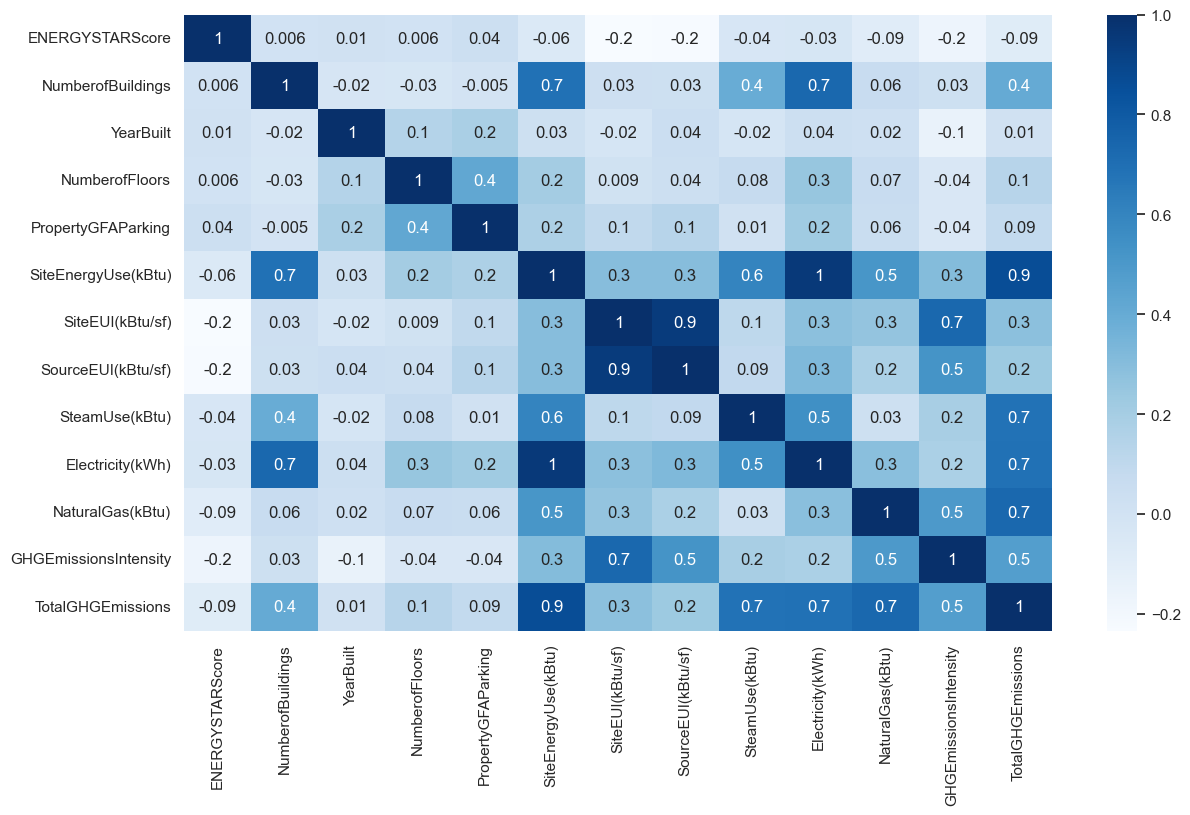

In [14]:
plt.figure(figsize=(14,8))
sb.set_theme(style="white")
corr = df.corr()
heatmap = sb.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [15]:
Df=df.drop(columns=["PrimaryPropertyType","SourceEUI(kBtu/sf)","GHGEmissionsIntensity","SiteEUI(kBtu/sf)","NaturalGas(kBtu)","Electricity(kWh)","SteamUse(kBtu)"])
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ENERGYSTARScore      3376 non-null   float64
 1   BuildingType         3376 non-null   object 
 2   NumberofBuildings    3376 non-null   float64
 3   YearBuilt            3376 non-null   int64  
 4   NumberofFloors       3376 non-null   int64  
 5   PropertyGFAParking   3376 non-null   int64  
 6   SiteEnergyUse(kBtu)  3376 non-null   float64
 7   TotalGHGEmissions    3376 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 211.1+ KB


# Matrice de Corrélation

/var/folders/64/xbnl04752rd562f9w8d832xh0000gn/T/ipykernel_39638/511831904.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = Df.corr()


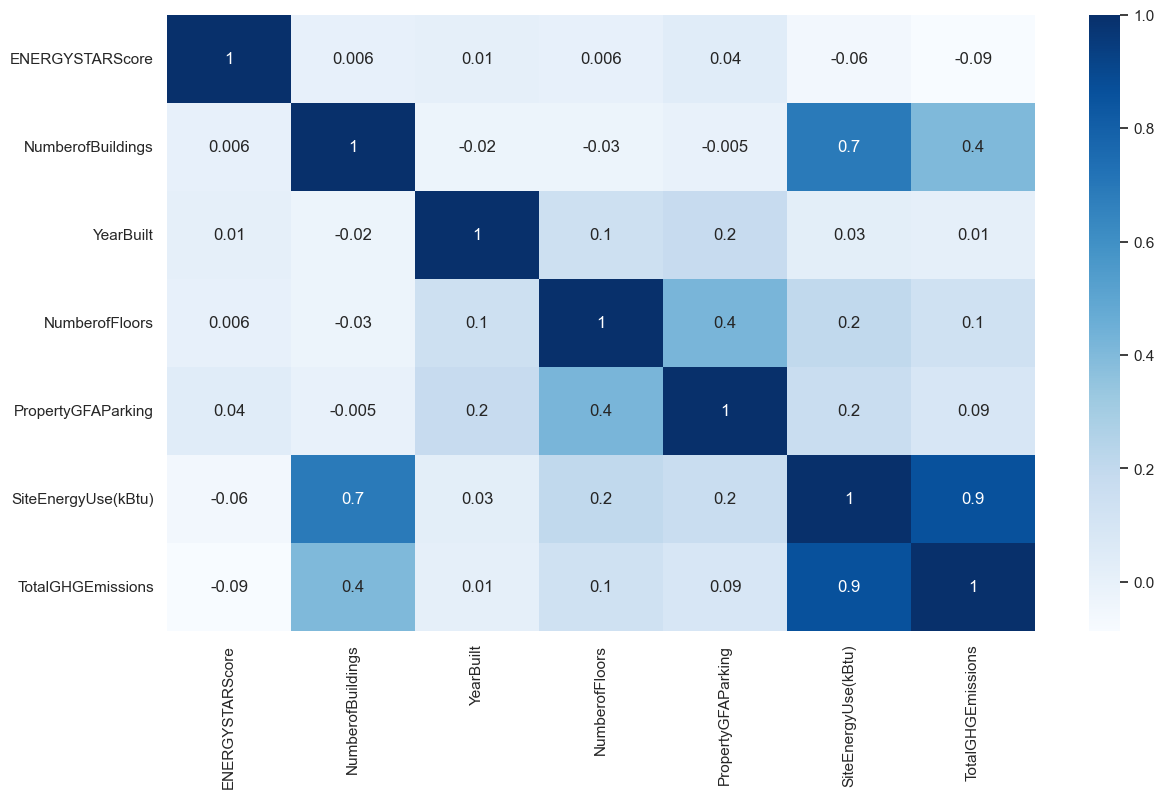

In [16]:
plt.figure(figsize=(14,8))
sb.set_theme(style="white")
corr = Df.corr()
heatmap = sb.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [17]:
Df.describe()

,ENERGYSTARScore,NumberofBuildings,YearBuilt,NumberofFloors,PropertyGFAParking,SiteEnergyUse(kBtu),TotalGHGEmissions
count,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3.376000e+03,3376.000000
mean,69.686908,1.106635,1968.573164,4.709123,8001.526066,5.398336e+06,119.495228
std,23.477384,2.105908,33.088156,5.494465,32326.723928,2.159506e+07,538.131497
min,1.000000,0.000000,1900.000000,0.000000,0.000000,0.000000e+00,-0.800000
25%,61.000000,1.000000,1948.000000,2.000000,0.000000,9.260192e+05,9.547500
50%,75.000000,1.000000,1975.000000,4.000000,0.000000,1.803753e+06,33.920000
75%,85.000000,1.000000,1997.000000,5.000000,0.000000,4.218227e+06,93.717500
max,100.000000,111.000000,2015.000000,99.000000,512608.000000,8.739237e+08,16870.980000


# Gestion des valeurs atypiques

In [18]:
mean_value = Df['TotalGHGEmissions'].mean()
Df.loc[Df['TotalGHGEmissions'] < 0, 'TotalGHGEmissions'] = mean_value
Df.describe()

,ENERGYSTARScore,NumberofBuildings,YearBuilt,NumberofFloors,PropertyGFAParking,SiteEnergyUse(kBtu),TotalGHGEmissions
count,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3.376000e+03,3376.000000
mean,69.686908,1.106635,1968.573164,4.709123,8001.526066,5.398336e+06,119.530861
std,23.477384,2.105908,33.088156,5.494465,32326.723928,2.159506e+07,538.127512
min,1.000000,0.000000,1900.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,61.000000,1.000000,1948.000000,2.000000,0.000000,9.260192e+05,9.567500
50%,75.000000,1.000000,1975.000000,4.000000,0.000000,1.803753e+06,33.920000
75%,85.000000,1.000000,1997.000000,5.000000,0.000000,4.218227e+06,93.840000
max,100.000000,111.000000,2015.000000,99.000000,512608.000000,8.739237e+08,16870.980000


# Sélection du dataset final

In [19]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ENERGYSTARScore      3376 non-null   float64
 1   BuildingType         3376 non-null   object 
 2   NumberofBuildings    3376 non-null   float64
 3   YearBuilt            3376 non-null   int64  
 4   NumberofFloors       3376 non-null   int64  
 5   PropertyGFAParking   3376 non-null   int64  
 6   SiteEnergyUse(kBtu)  3376 non-null   float64
 7   TotalGHGEmissions    3376 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 211.1+ KB


In [20]:
H=Df[["BuildingType"]]
H

,BuildingType
0,NonResidential
1,NonResidential
2,NonResidential
3,NonResidential
4,NonResidential
...,...
3371,Nonresidential COS
3372,Nonresidential COS
3373,Nonresidential COS
3374,Nonresidential COS


In [21]:
mask = Df['BuildingType'].isin(['NonResidential', 'Nonresidential COS'])
Da = Df[mask]
Da.describe()

,ENERGYSTARScore,NumberofBuildings,YearBuilt,NumberofFloors,PropertyGFAParking,SiteEnergyUse(kBtu),TotalGHGEmissions
count,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1.545000e+03,1545.000000
mean,67.726861,1.036246,1961.228479,4.286084,13831.928803,7.637701e+06,164.747751
std,23.929093,0.569047,32.924414,6.784695,43692.644201,1.865323e+07,570.572662
min,1.000000,0.000000,1900.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,60.000000,1.000000,1929.000000,1.000000,0.000000,1.206166e+06,19.510000
50%,75.000000,1.000000,1965.000000,2.000000,0.000000,2.602214e+06,48.350000
75%,79.000000,1.000000,1988.000000,4.000000,0.000000,6.963616e+06,135.810000
max,100.000000,9.000000,2015.000000,99.000000,512608.000000,2.930908e+08,12307.160000


In [22]:
Da.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 3375
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ENERGYSTARScore      1545 non-null   float64
 1   BuildingType         1545 non-null   object 
 2   NumberofBuildings    1545 non-null   float64
 3   YearBuilt            1545 non-null   int64  
 4   NumberofFloors       1545 non-null   int64  
 5   PropertyGFAParking   1545 non-null   int64  
 6   SiteEnergyUse(kBtu)  1545 non-null   float64
 7   TotalGHGEmissions    1545 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 108.6+ KB


In [23]:
Da.reset_index(drop=True)
Da.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 3375
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ENERGYSTARScore      1545 non-null   float64
 1   BuildingType         1545 non-null   object 
 2   NumberofBuildings    1545 non-null   float64
 3   YearBuilt            1545 non-null   int64  
 4   NumberofFloors       1545 non-null   int64  
 5   PropertyGFAParking   1545 non-null   int64  
 6   SiteEnergyUse(kBtu)  1545 non-null   float64
 7   TotalGHGEmissions    1545 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 108.6+ KB


# Analyse Univariée

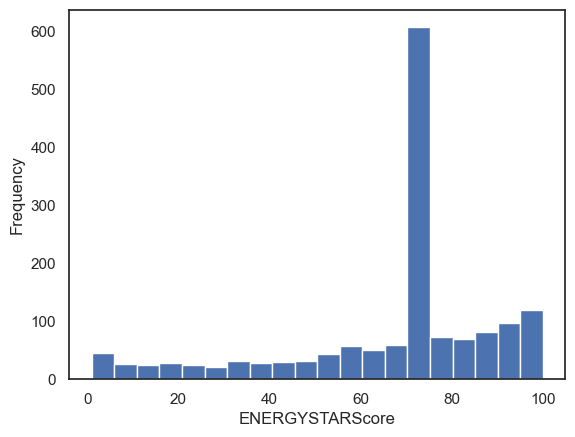

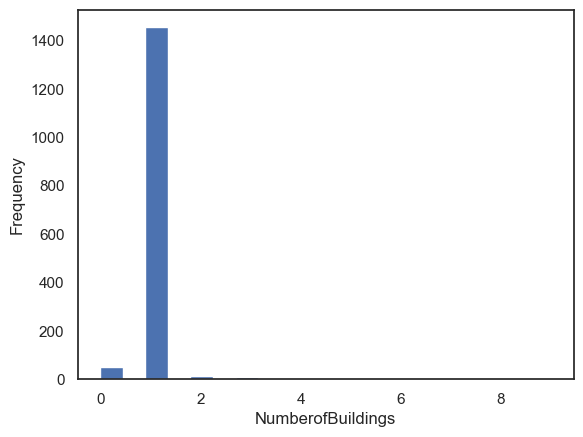

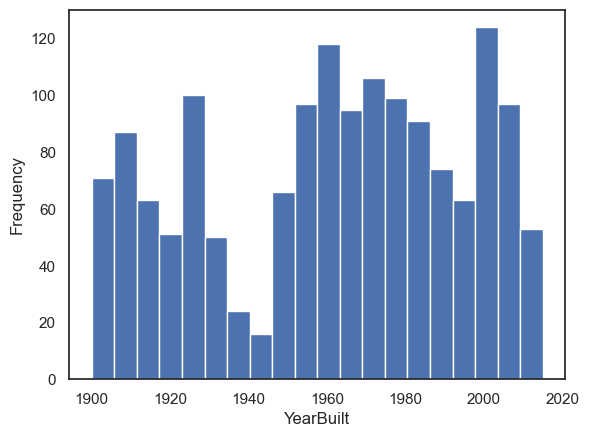

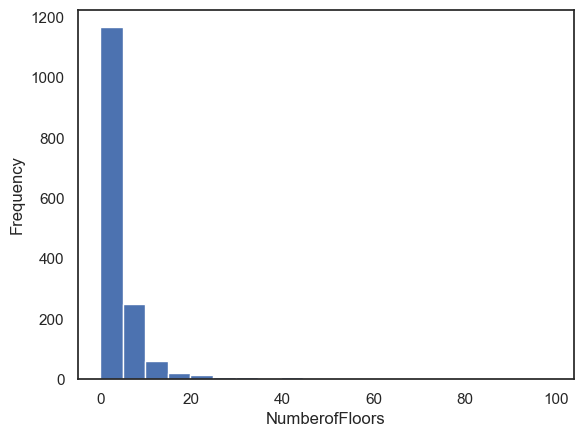

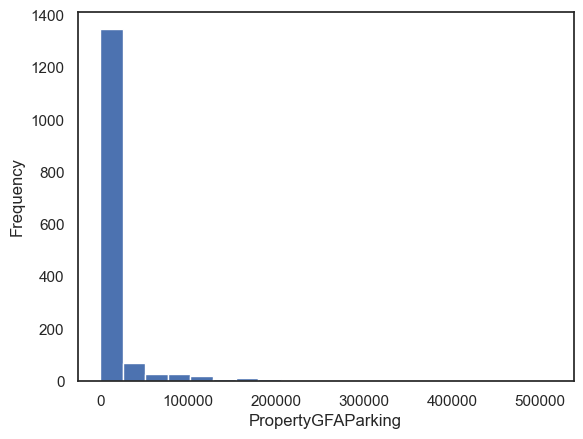

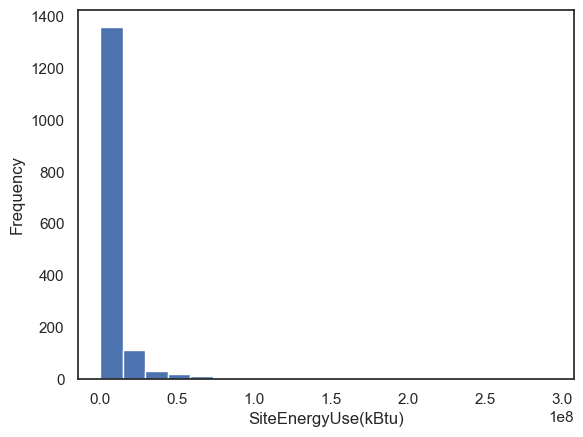

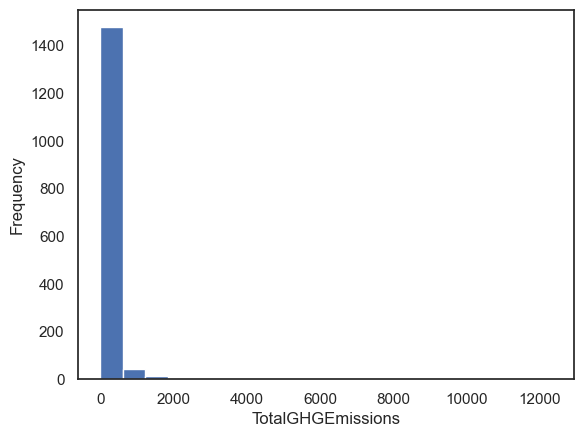

In [24]:
num_cols = Da.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    plt.hist(Da[col], bins=20)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Analyse multivariée

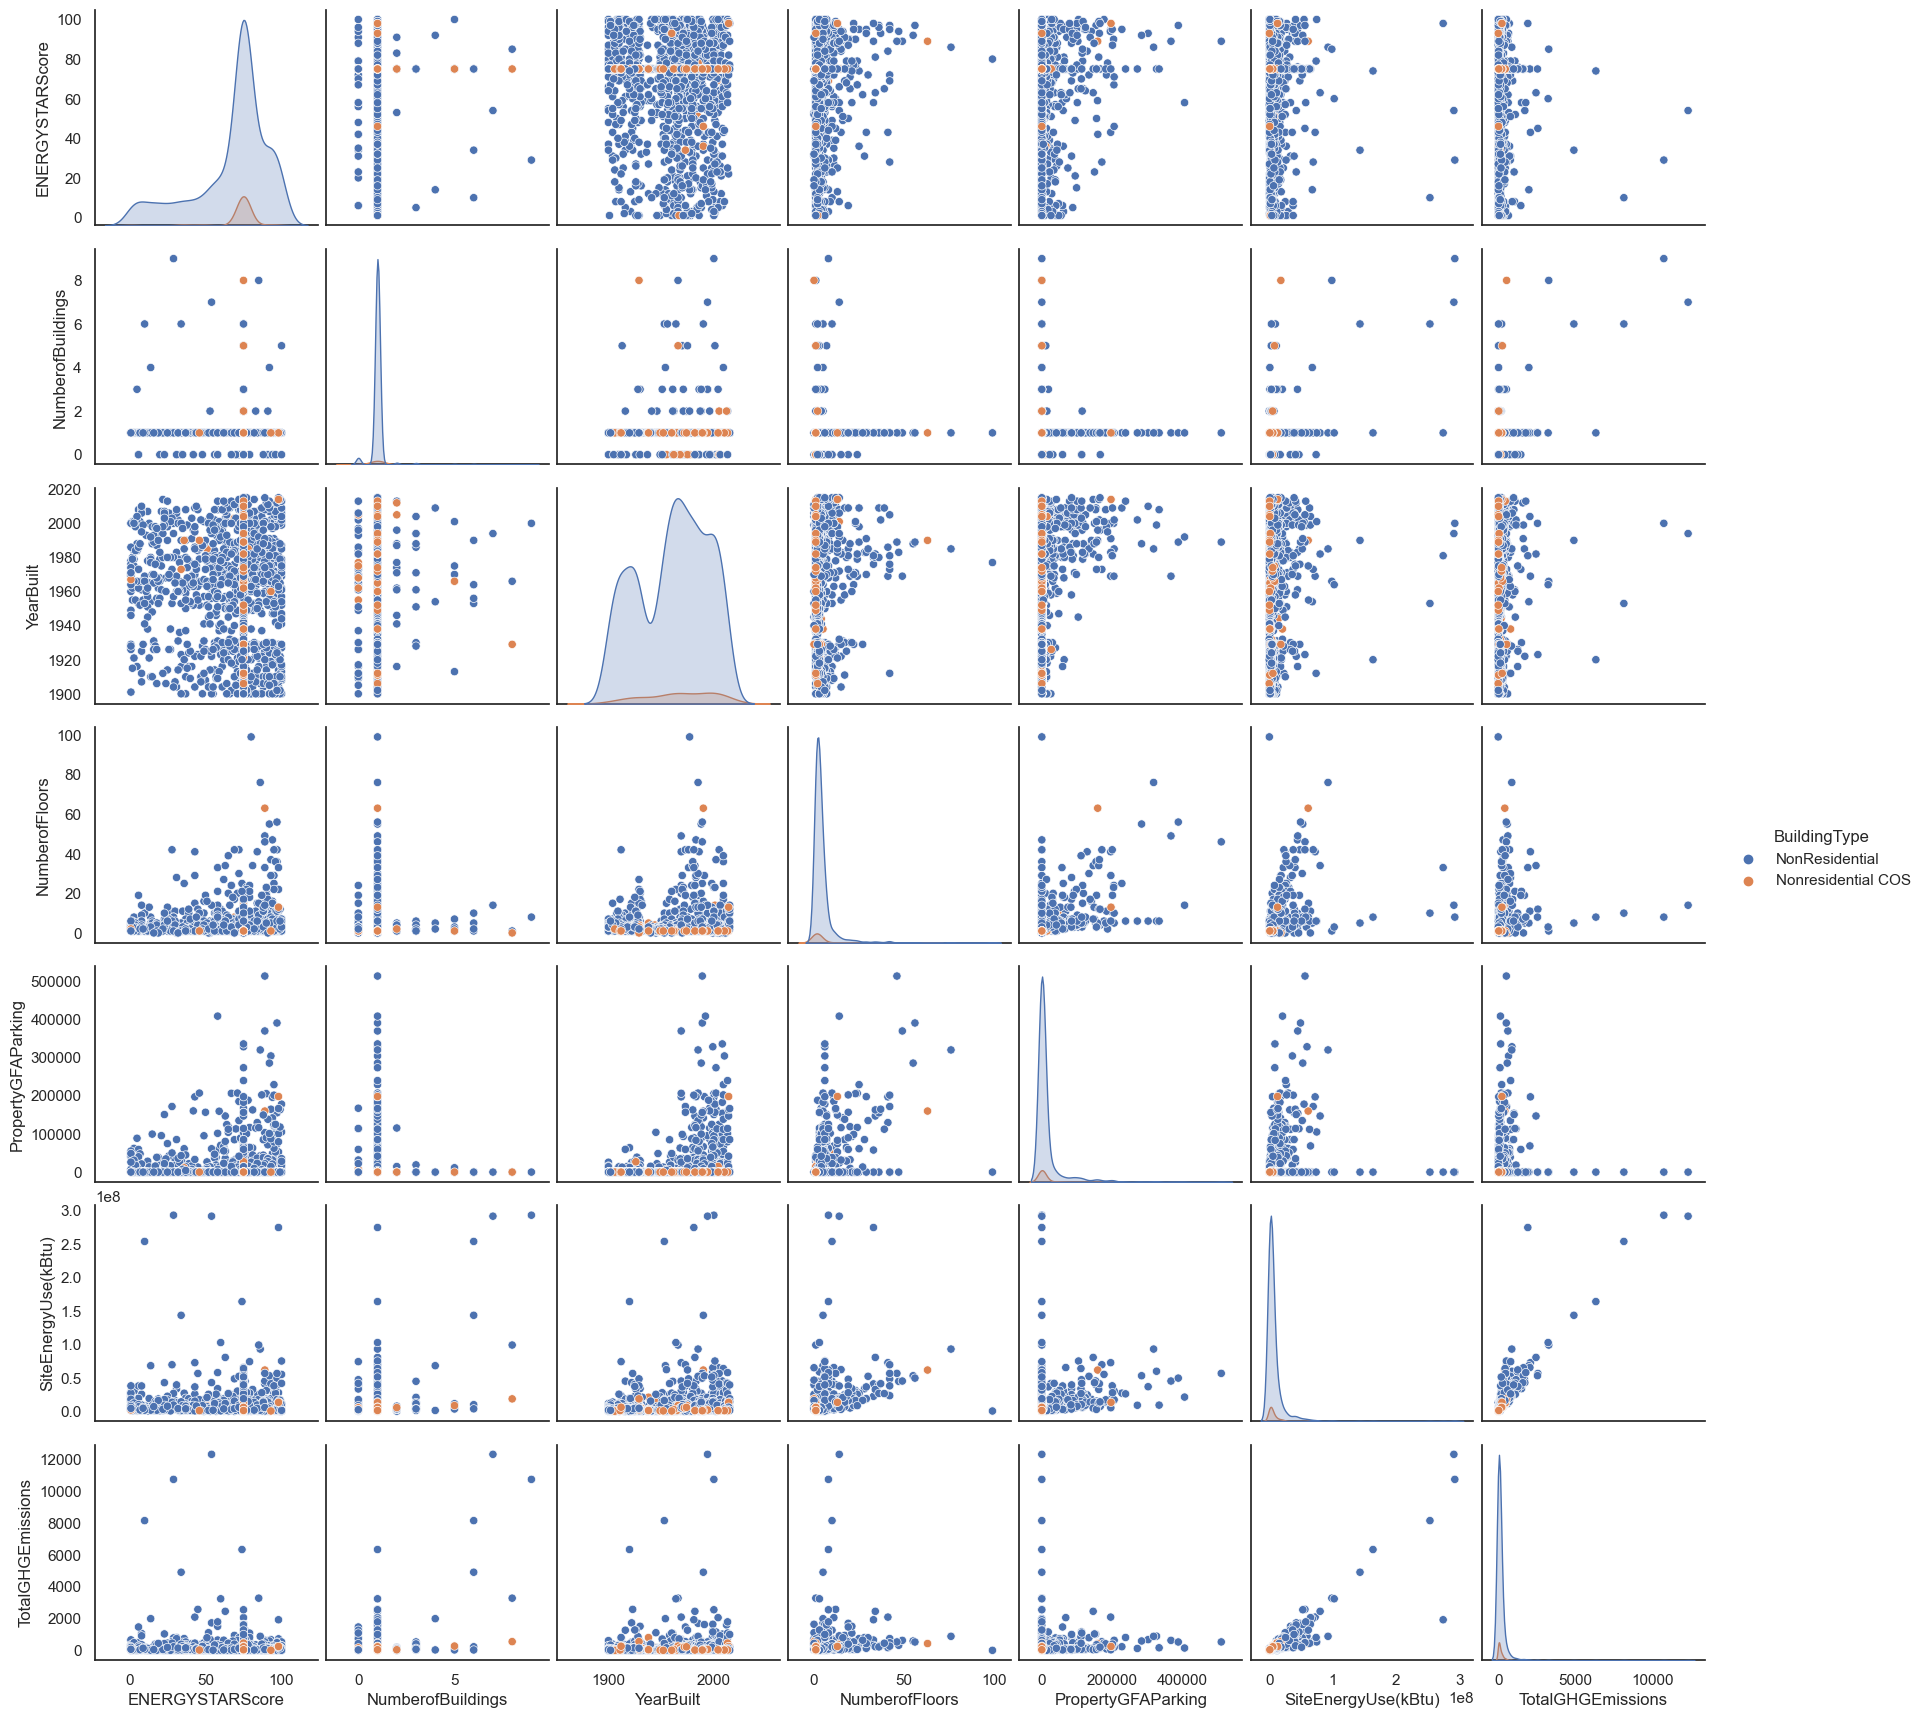

In [25]:
sb.pairplot(Da,hue='BuildingType',diag_kind="kde")

In [26]:
da=Da.drop(columns=["BuildingType"])

In [27]:
da.duplicated().sum()

0

# Analyses des composantes principales

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.collections import LineCollection

In [29]:
x=da.values
x.shape

(1545, 7)

In [30]:
scaler=StandardScaler()

In [31]:
scaler.fit(x)

StandardScaler()

In [32]:
x_scaled=scaler.transform(x)

In [33]:
idx = ["mean", "std"]

pd.DataFrame(x_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6
mean,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [34]:
n_components = 7
pca = PCA(n_components=n_components)
pca.fit(x_scaled)

PCA(n_components=7)

In [35]:
pca.explained_variance_ratio_

array([0.35077607, 0.21638321, 0.14974045, 0.12371101, 0.08360804,
       0.06303979, 0.01274144])

In [36]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([35.08, 21.64, 14.97, 12.37,  8.36,  6.3 ,  1.27])

In [37]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 35.,  57.,  72.,  84.,  92.,  99., 100.])

In [38]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7]

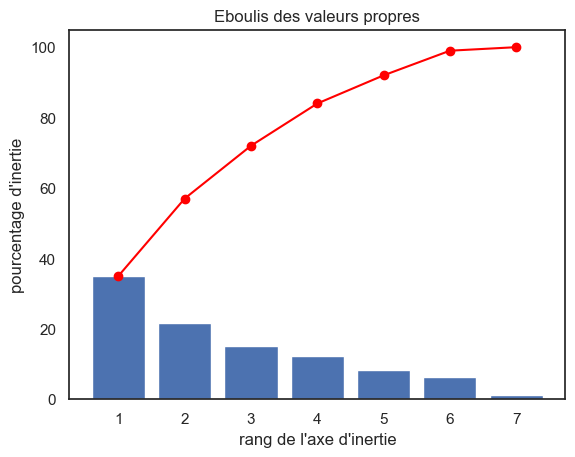

In [39]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

# Premier plan factoriel

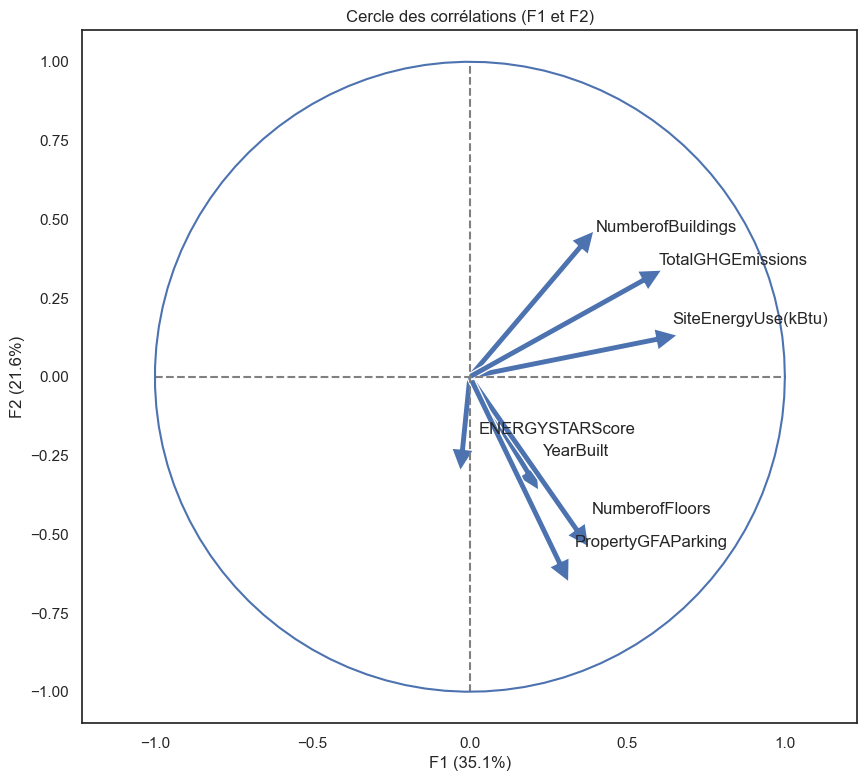

In [40]:
features = da.columns
features
x, y = 0,1
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

# Deuxième plan factoriel

In [41]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
   

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

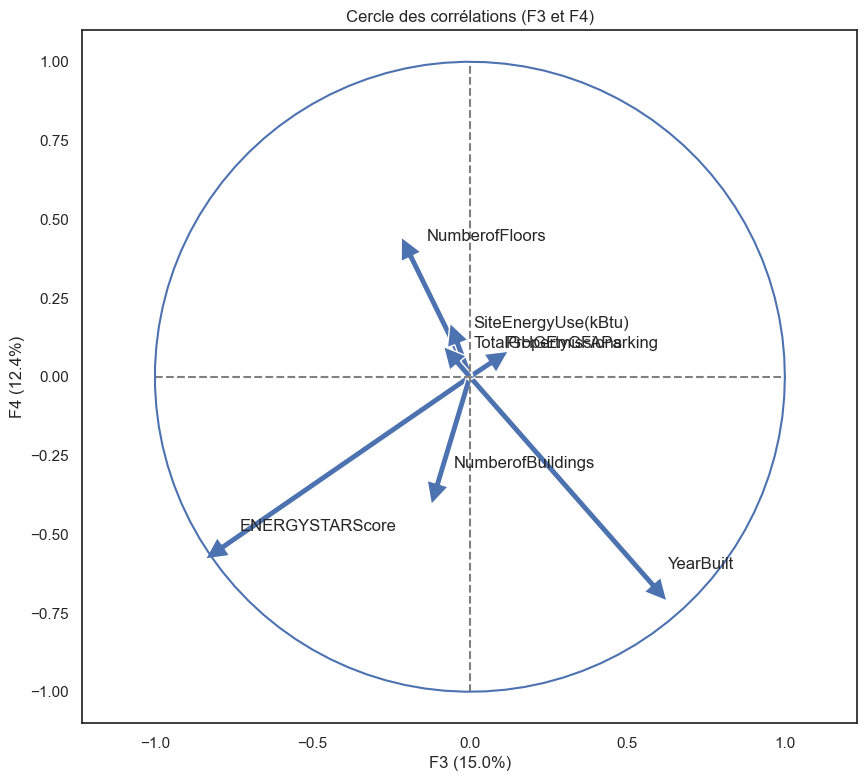

In [42]:
correlation_graph(pca, (2,3), features)

# Eingen vectors

In [43]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,ENERGYSTARScore,NumberofBuildings,YearBuilt,NumberofFloors,PropertyGFAParking,SiteEnergyUse(kBtu),TotalGHGEmissions
F1,-0.02,0.35,0.18,0.34,0.28,0.59,0.55
F2,-0.23,0.41,-0.30,-0.48,-0.59,0.12,0.31
F3,-0.78,-0.10,0.58,-0.19,0.06,-0.04,-0.04
F4,-0.54,-0.34,-0.66,0.38,0.04,0.10,0.04
F5,-0.21,0.74,-0.20,0.10,0.39,-0.32,-0.32
F6,-0.04,0.19,0.25,0.67,-0.64,-0.09,-0.18
F7,-0.00,0.05,-0.03,-0.13,-0.05,0.71,-0.68


In [44]:
da.to_csv("Pred.csv", index=False)